In [1]:
from openslide import open_slide
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['image.cmap']

'viridis'

In [3]:
plt.rcParams['image.cmap'] = 'Greys'

In [4]:
TEST_LOCAL_DIR = '../test/'

In [5]:
tumor_mask_filename = 'tumor_091_mask.tif'

In [6]:
tumor_mask = open_slide(os.path.join(TEST_LOCAL_DIR, tumor_mask_filename))

In [7]:
tumor_mask.level_downsamples

(1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0)

In [9]:
tumor_mask.level_dimensions

((61440, 53760),
 (30720, 26880),
 (15360, 13440),
 (7680, 6720),
 (3840, 3360),
 (1920, 1680),
 (960, 840),
 (480, 420))

In [25]:
# See https://openslide.org/api/python/#openslide.OpenSlide.read_region
# Note: x,y coords are with respect to level 0.
# There is an example below of working with coordinates
# with respect to a higher zoom level.

# Read a region from the slide
# Return a numpy RBG array
def read_slide(slide, x, y, level, width, height, as_float=False):
    im = slide.read_region((x,y), level, (width, height))
    im = im.convert('RGB') # drop the alpha channel
    if as_float:
        im = np.asarray(im, dtype=np.float32)
    else:
        im = np.asarray(im)
    assert im.shape == (height, width, 3)
    return im

In [26]:
tumor_mask_image = read_slide(tumor_mask, 
                         x=0, 
                         y=0, 
                         level=3, 
                         width=tumor_mask.level_dimensions[3][0], 
                         height=tumor_mask.level_dimensions[3][1])

In [60]:
temp = np.ones_like(tumor_mask_image) * 255 - tumor_mask_image * 255

In [62]:
temp.max(), temp.min()

(255, 0)

In [38]:
from PIL import Image


In [64]:
tumor_mask_im = Image.fromarray(temp)

In [69]:
tumor_mask_im.save('../test/temp_mask.png', format='PNG')

In [71]:
tumor_mask_im.save('../test/temp_mask.jpg', format='JPEG')

In [72]:
test1 = Image.open('../test/temp_mask.png')
test2 = Image.open('../test/temp_mask.jpg')

In [75]:
arr1 = np.asarray(test1)
arr2 = np.asarray(test2)

In [92]:
tumor_mask_im.save('../test/temp_mask.tif', format='TIFF')

In [ ]:
plt.imsave()

In [115]:
temp = Image.fromarray(tumor_mask_arr_one_channel)

In [125]:
plt.imsave('../test/delete.png', np.asarray(temp))

In [127]:
temp.save('../test/delete2.png', format='PNG')

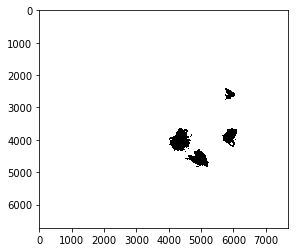

In [123]:
plt.imshow(np.asarray(temp))

In [111]:
np.asarray(temp).sum()

190794060

In [109]:
tumor_mask_arr_one_channel.sum()

748212

In [129]:
aa = Image.open('../test/delete.png')

In [136]:
aa_l = aa.convert('L')

In [137]:
aa_arr = np.asarray(aa_l)

In [138]:
aa_arr.shape

(6720, 7680)

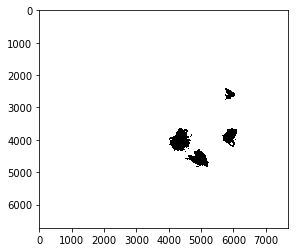

In [144]:
plt.imshow(255 - aa_arr)